In [1]:
!pip install Bio


In [2]:
from Bio import SeqIO
import gzip
import csv


In [3]:

with gzip.open("ERR4796172.fastq.gz", "rt") as handle:
    # iterate over the records and store the data in a list of tuples
    records = [(record.id, str(record.seq), str(record.letter_annotations["phred_quality"])) for record in SeqIO.parse(handle, "fastq")]

# create a new CSV file and write the data from the fastq file to it
with open("ERR4796172.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile, delimiter=",")
    
    # write the header row to the CSV file
    writer.writerow(["ID", "Sequence", "Quality"])
    
    # iterate over the list of tuples and write each tuple to a new row in the CSV file
    for record in records:
        writer.writerow(record)

In [143]:
import pandas as pd
df = pd.read_csv('ERR4796172.csv', nrows=200000)

In [144]:
df

,ID,Sequence,Quality
0,ERR4796172.1,CCCGGTGCTGGCAATCTCGTTTAAACTACATGCAGGAACAGCAAAG...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3..."
1,ERR4796172.2,GGTGAATGATACCCGGTGCTGGCAATCTCGTTTAAACTACATGCAG...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3..."
2,ERR4796172.3,GCATCAAGACCCTGTGACCTCCCAAAGGCCCGGTGGAAAGGACACG...,"[32, 32, 32, 32, 32, 36, 36, 36, 21, 36, 32, 3..."
3,ERR4796172.4,GACCACAGCATCAAGACCCTGTGACCTCCCAAAGGCCCAGTGGAAA...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3..."
4,ERR4796172.5,TCGAGACCTGATGCTGGGGAAGGGCATGCCTGGCATCACCACACAC...,"[32, 14, 32, 14, 32, 14, 32, 36, 14, 36, 36, 1..."
...,...,...,...
199995,ERR4796172.199996,CGCCCAGATCCACCAGCTGGAAGACTTGGGGTGACAATCCTCAGCC...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3..."
199996,ERR4796172.199997,TGCCCAGATCCACCAGCTGGAAGACTTGGGGTGACAATCCTCAGCC...,"[32, 32, 32, 32, 32, 36, 36, 32, 36, 32, 36, 3..."
199997,ERR4796172.199998,CTGGGCCCAGATCCACCAGCTGGAAGACTTGGGGTGACAATCCTCA...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3..."
199998,ERR4796172.199999,CGCTGGGCCCAGATCCACCAGCTGGAAGACTTGGGGTGACAATCCT...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3..."


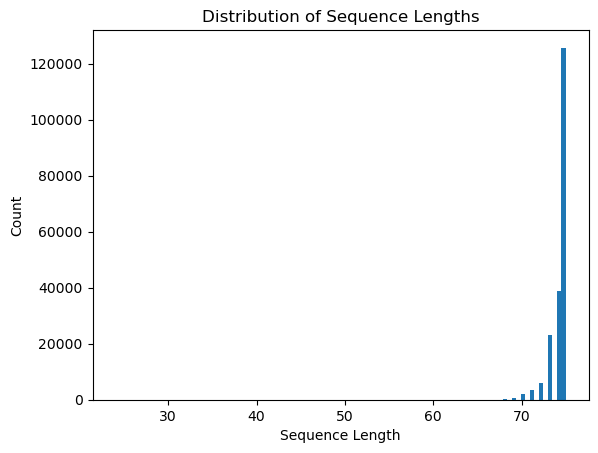

In [145]:
import matplotlib.pyplot as plt

lengths = [len(seq) for seq in df['Sequence']]
plt.hist(lengths, bins=100)
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.title('Distribution of Sequence Lengths')
plt.show()


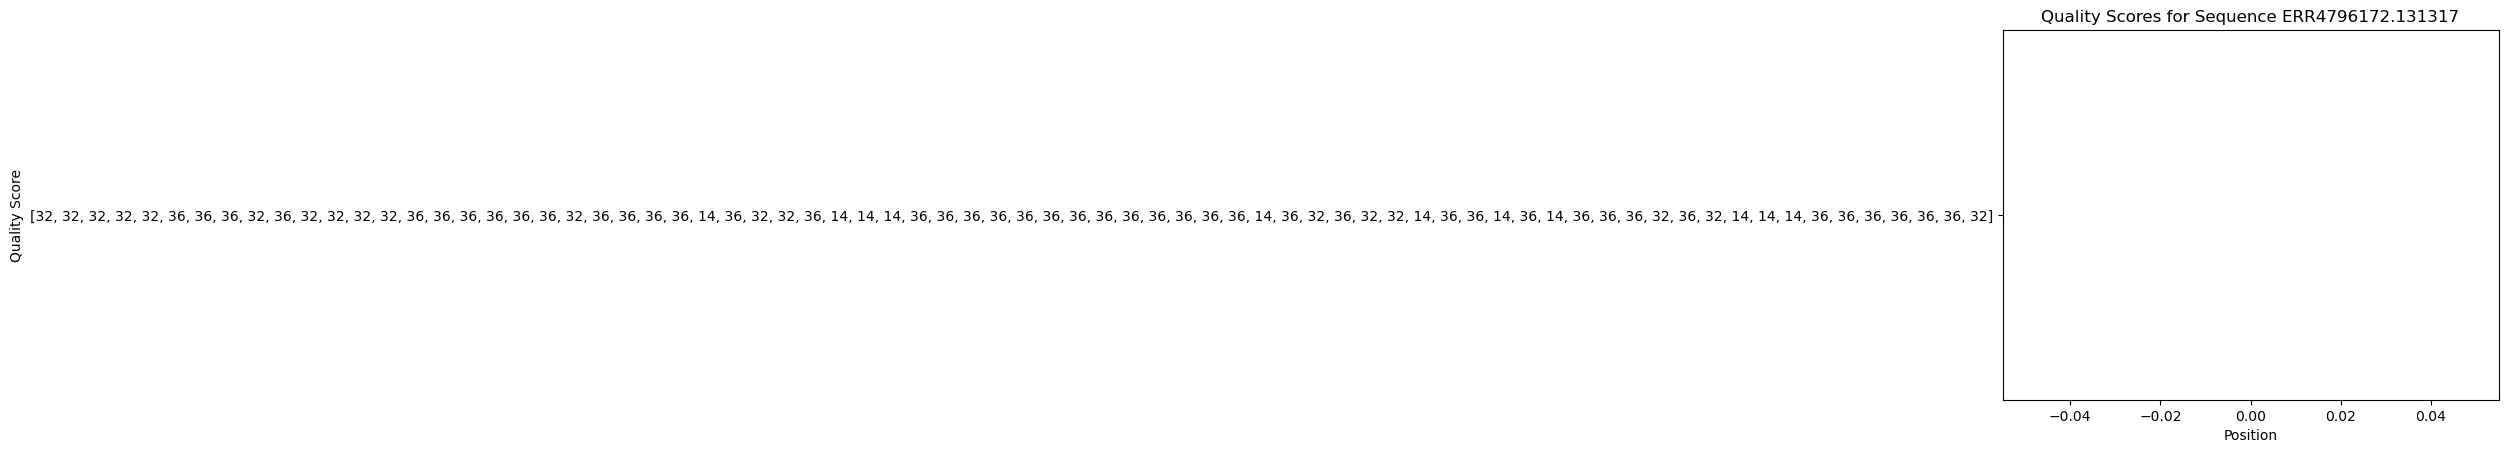

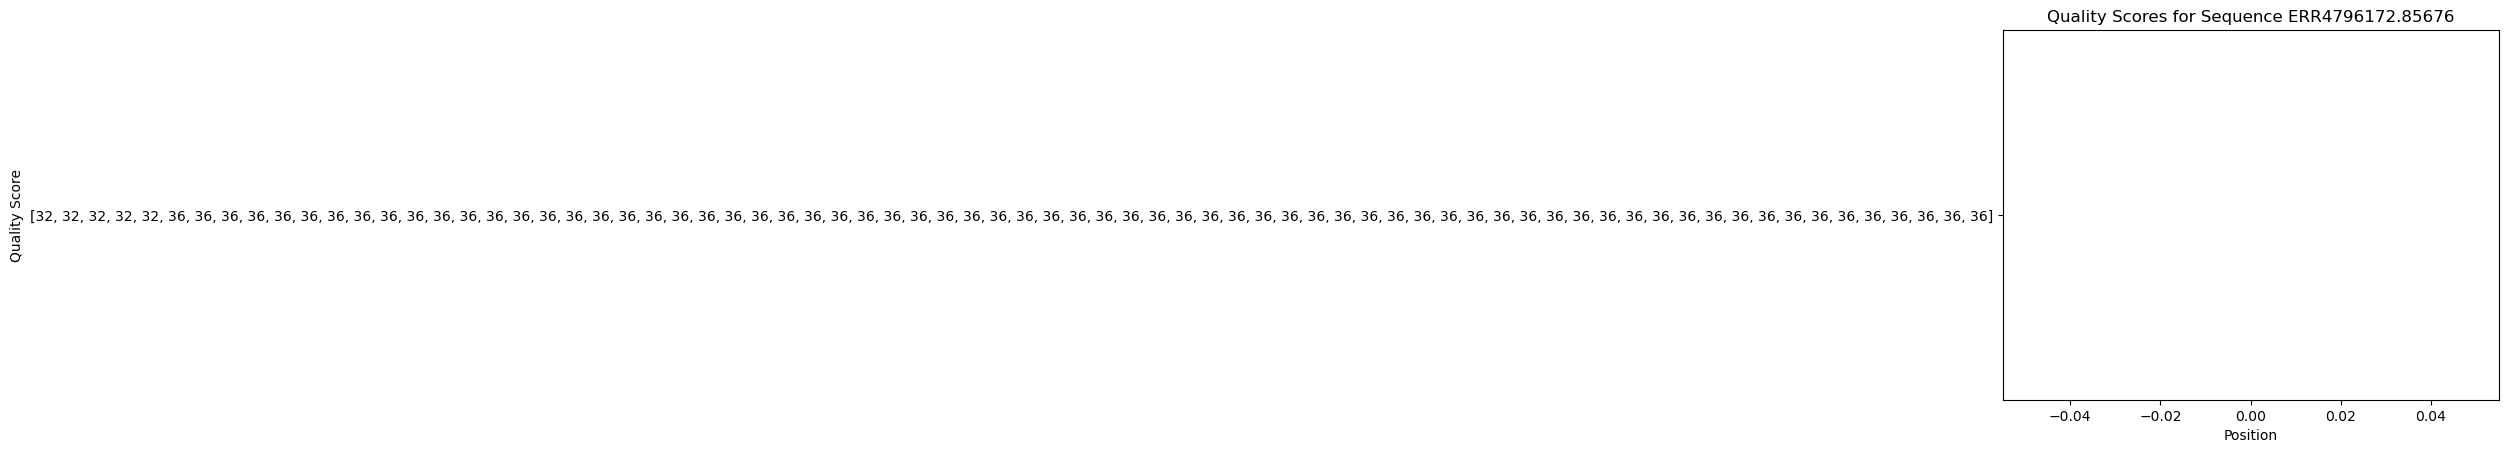

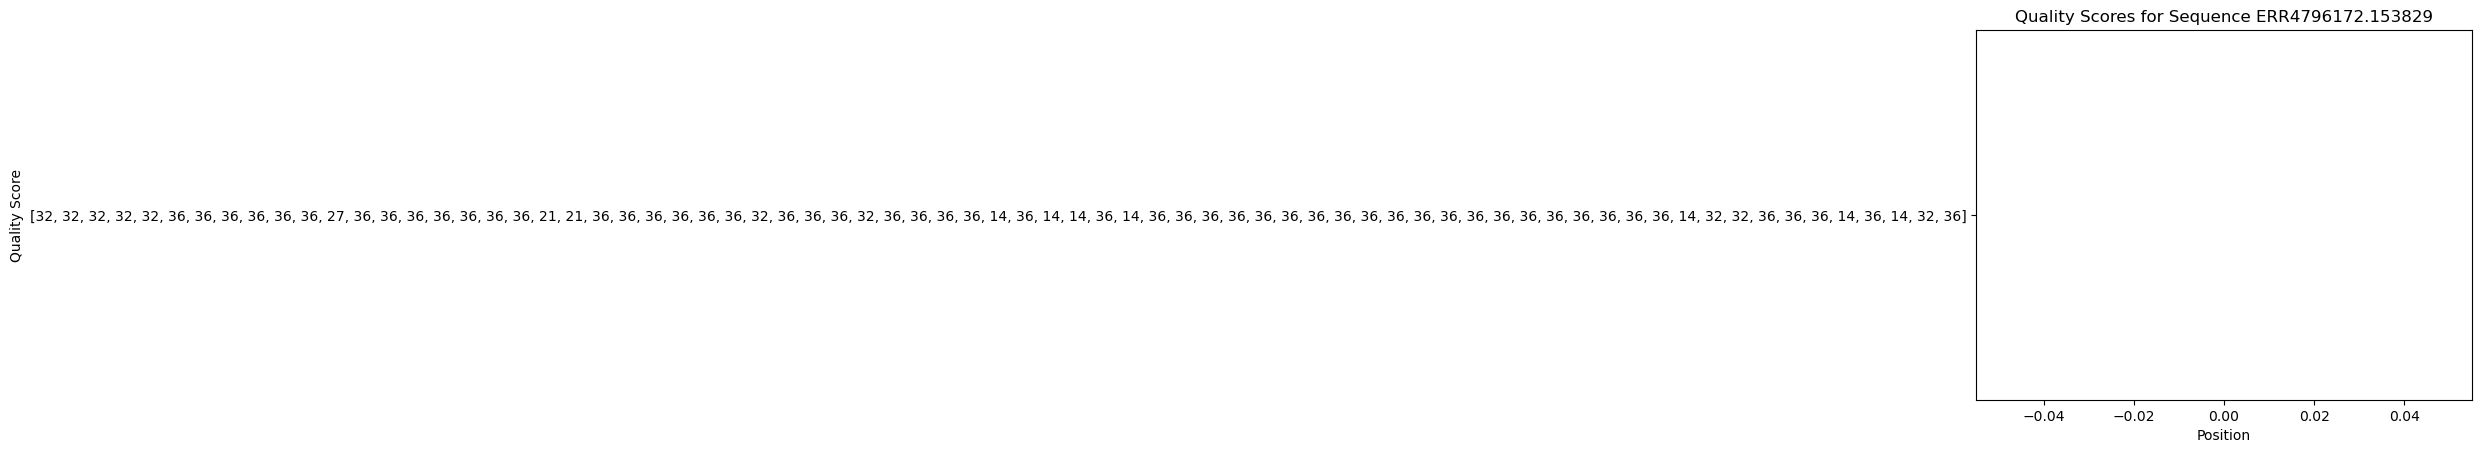

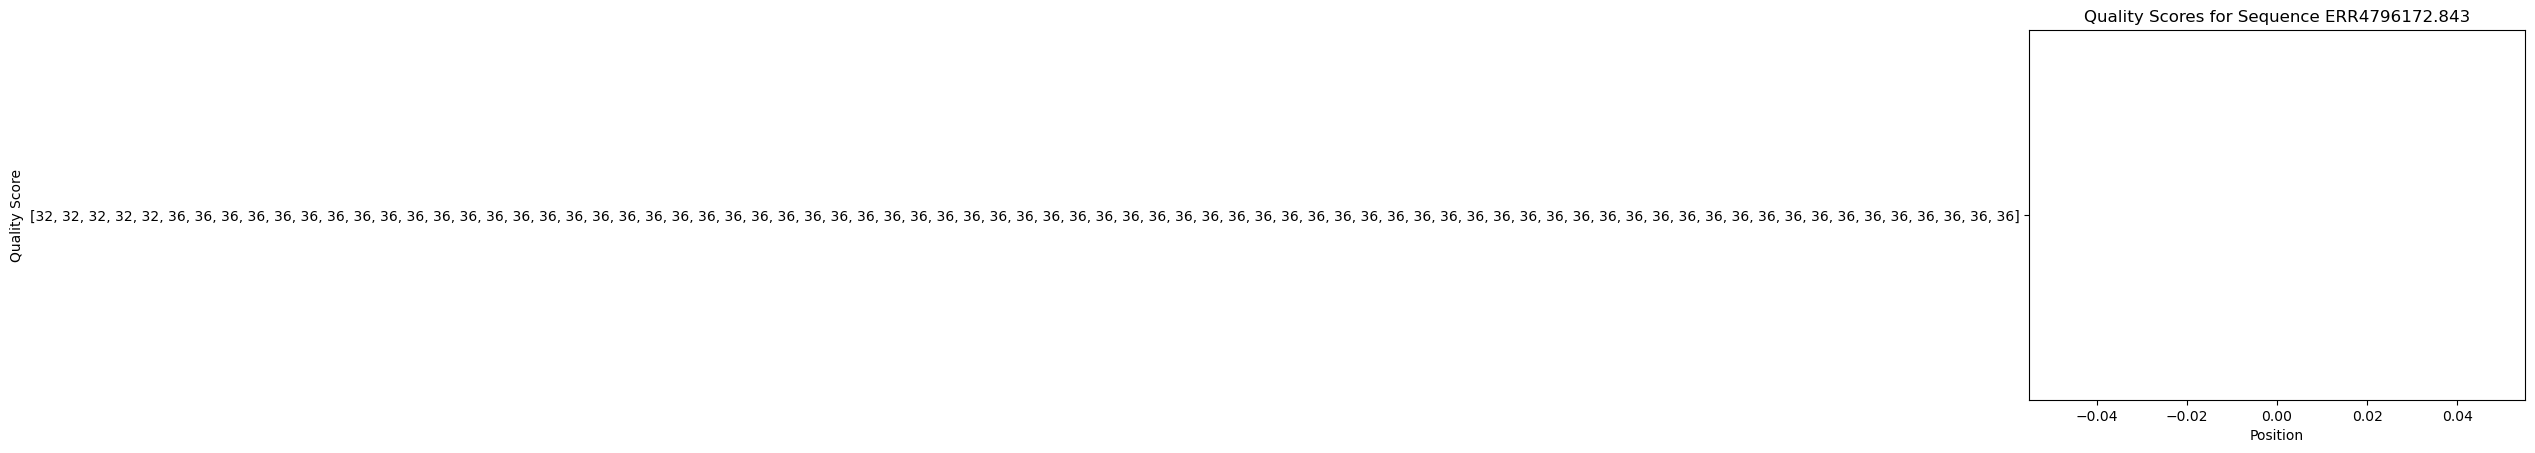

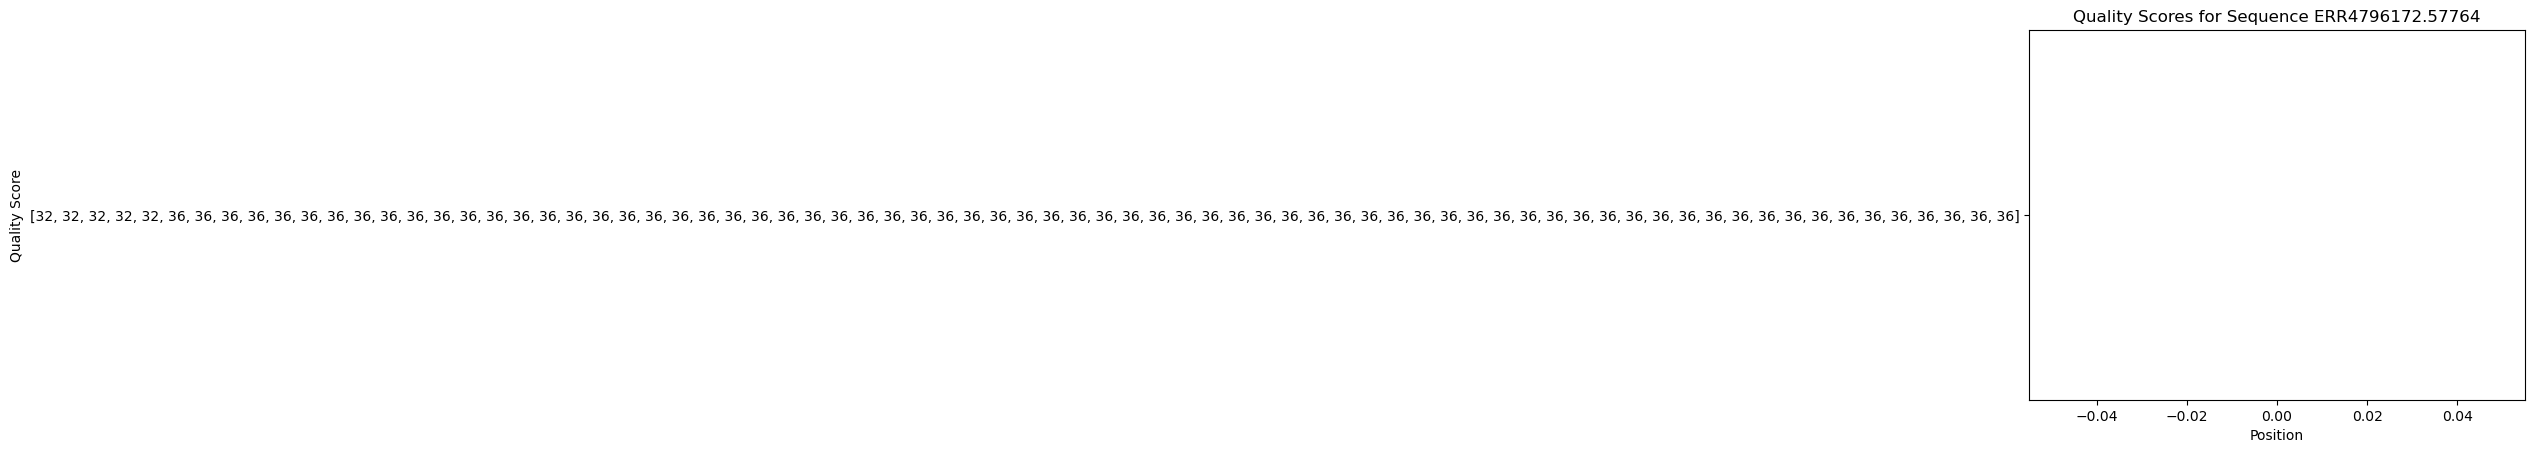

In [146]:
import random

# Select 5 random sequences
seq_ids = random.sample(df['ID'].tolist(), 5)

for seq_id in seq_ids:
    seq_index = df.index[df['ID'] == seq_id][0]
    seq_quality = df.at[seq_index, 'Quality']
    
    plt.plot(seq_quality)
    plt.xlabel('Position')
    plt.ylabel('Quality Score')
    plt.title(f'Quality Scores for Sequence {seq_id}')
    plt.show()


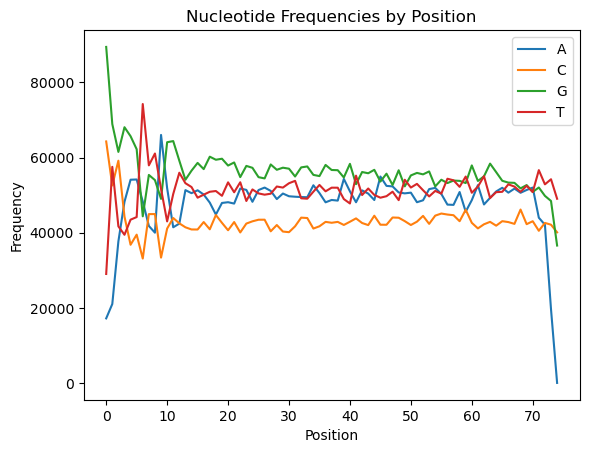

In [147]:
import numpy as np

nucleotides = ['A', 'C', 'G', 'T']
counts = np.zeros((len(df['Sequence'][0]), 4))

for seq in df['Sequence']:
    for i in range(len(seq)):
        if seq[i] == 'A':
            counts[i, 0] += 1
        elif seq[i] == 'C':
            counts[i, 1] += 1
        elif seq[i] == 'G':
            counts[i, 2] += 1
        elif seq[i] == 'T':
            counts[i, 3] += 1

positions = np.arange(len(df['Sequence'][0]))
for i, nucleotide in enumerate(nucleotides):
    plt.plot(positions, counts[:, i], label=nucleotide)

plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequencies by Position')
plt.legend()
plt.show()


In [148]:
df2 = pd.read_csv('ERR4796172.csv', nrows=1000)
# define a function to count nucleotides
def count_nucleotides(sequence):
    return {
        'C': sequence.count('C'),
        'T': sequence.count('T'),
        'G': sequence.count('G'),
        'A': sequence.count('A')
    }

# apply the count_nucleotides function to each sequence in the 'Sequence' column
df2['Nucleotide_Counts'] = df['Sequence'].apply(count_nucleotides)




In [149]:
counts = df2.at[0, 'Nucleotide_Counts']  # get nucleotide counts for the first row
c_count = counts['C']  # get the count of C nucleotides in the first sequence


In [150]:
counts


{'C': 19, 'T': 17, 'G': 17, 'A': 22}

In [151]:
c_count

19

In [152]:
df.dropna(inplace=True)

In [153]:
df.isna().sum()

ID          0
Sequence    0
Quality     0
dtype: int64

In [154]:
import statistics
a_c = lambda x: str(x).count('C')
df['C']= df['Sequence'].apply(a_c)
a_g = lambda x: str(x).count('G')
df['G']= df['Sequence'].apply(a_g)
a_a = lambda x: str(x).count('A')
df['A']= df['Sequence'].apply(a_a)
a_t = lambda x: str(x).count('T')
df['T']= df['Sequence'].apply(a_t)

In [155]:
def str_to_list(s):
    return [int(x) for x in s.strip('[]').split(',')]

# apply the function to each value in the "Quality" column to create a new column of lists
df['Quality_list'] = df['Quality'].apply(str_to_list)

# calculate the mean of each list using NumPy's mean function
df['avg'] = df['Quality_list'].apply(np.mean)

# Round the average to 2 decimal places
df['avg'] = df['avg'].round(2)
df = df.drop(columns=['Quality_list'])

In [156]:
df

,ID,Sequence,Quality,C,G,A,T,avg
0,ERR4796172.1,CCCGGTGCTGGCAATCTCGTTTAAACTACATGCAGGAACAGCAAAG...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",19,17,22,17,35.68
1,ERR4796172.2,GGTGAATGATACCCGGTGCTGGCAATCTCGTTTAAACTACATGCAG...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",16,19,24,16,34.65
2,ERR4796172.3,GCATCAAGACCCTGTGACCTCCCAAAGGCCCGGTGGAAAGGACACG...,"[32, 32, 32, 32, 32, 36, 36, 36, 21, 36, 32, 3...",20,23,23,9,34.67
3,ERR4796172.4,GACCACAGCATCAAGACCCTGTGACCTCCCAAAGGCCCAGTGGAAA...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",21,21,23,8,35.73
4,ERR4796172.5,TCGAGACCTGATGCTGGGGAAGGGCATGCCTGGCATCACCACACAC...,"[32, 14, 32, 14, 32, 14, 32, 36, 14, 36, 36, 1...",19,28,16,12,32.12
...,...,...,...,...,...,...,...,...
199995,ERR4796172.199996,CGCCCAGATCCACCAGCTGGAAGACTTGGGGTGACAATCCTCAGCC...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",25,25,15,9,35.34
199996,ERR4796172.199997,TGCCCAGATCCACCAGCTGGAAGACTTGGGGTGACAATCCTCAGCC...,"[32, 32, 32, 32, 32, 36, 36, 32, 36, 32, 36, 3...",24,25,15,10,35.57
199997,ERR4796172.199998,CTGGGCCCAGATCCACCAGCTGGAAGACTTGGGGTGACAATCCTCA...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",23,27,15,10,35.25
199998,ERR4796172.199999,CGCTGGGCCCAGATCCACCAGCTGGAAGACTTGGGGTGACAATCCT...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",23,27,15,10,35.63


In [157]:

# Split the data into X and y
X = df[['C', 'T', 'A', 'G']]
y = df['avg']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the model
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_sgd = model.predict(X_test)

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
mse = mean_squared_error(y_test, y_pred_sgd)
r2 = r2_score(y_test, y_pred_sgd)
print(f"MSE: {mse:.2f}, R-squared: {r2:.2f}")


MSE: 13358363082.95, R-squared: -4364801311.38


C:\Users\sanda\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [158]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['C', 'T', 'A', 'G']], df['avg'], test_size=0.2, random_state=1)

# Creating a Lasso regression object
lasso_reg = Lasso(alpha=1)

# Fitting the model on the training data
lasso_reg.fit(X_train, y_train)

# Predicting the target variable for the testing data
y_pred_lasso = lasso_reg.predict(X_test)

# Calculating the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print('Lasso Regression')
print('MSE:', mse)
print('R2:', r2)


Lasso Regression
MSE: 3.044130002558374
R2: 0.005340508585755188


In [159]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['C', 'T', 'A', 'G']], df['avg'], test_size=0.2, random_state=1)

# Creating a Ridge regression object
ridge_reg = Ridge(alpha=1)

# Fitting the model on the training data
ridge_reg.fit(X_train, y_train)

# Predicting the target variable for the testing data
y_pred_ridge= ridge_reg.predict(X_test)

# Calculating the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print('Ridge Regression')
print('MSE:', mse)
print('R2:', r2)


Ridge Regression
MSE: 2.964117431535835
R2: 0.03148435366896096


In [160]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("MSE:", mse)
print("R2:", r2)

MSE: 3.1554918236481027
R2: -0.031046601108962735


In [161]:
from xgboost import XGBRegressor
# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xg = xgb_model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred_xg)
r2 = r2_score(y_test, y_pred_xg)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 2.919105974123989
R-squared: 0.04619169970853665


In [162]:
acc_sgd= mean_squared_error(y_test, y_pred_sgd)
acc_lasso = mean_squared_error(y_test, y_pred_lasso)
acc_ridge = mean_squared_error(y_test, y_pred_ridge)
acc_rf = mean_squared_error(y_test, y_pred_rf)
acc_xg = mean_squared_error(y_test, y_pred_xg)

models = [("Stochastic Gradient Descent", acc_sgd),           ("Lasso Regression", acc_lasso),          ("Ridge Regression", acc_ridge),          ("Random Forest", acc_rf),          ("XGBoost", acc_xg)]
for name, acc in models:
    print(name + " Accuracy: {:.2f}%".format(100 - (acc/np.mean(y_test**2))*100))



Stochastic Gradient Descent Accuracy: -1108223385.97%
Lasso Regression Accuracy: 99.75%
Ridge Regression Accuracy: 99.75%
Random Forest Accuracy: 99.74%
XGBoost Accuracy: 99.76%
